In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib notebook
plt.style.use('seaborn-colorblind')

In [121]:
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv')
#dataset1['Count'] = dataset1.count()
d1 = pd.DataFrame(dataset1['Team'].value_counts()).reset_index()
d1.rename(columns={"Team":"Total_National", "index":"Team"}, inplace=True)
dataset2.rename(columns={"Club":"Team"}, inplace=True)
df = d1.merge(dataset2)
df.rename(columns={"Total":"Total_International"}, inplace=True)

tn = np.array(df["Total_National"])
ti = np.array(df["Total_International"])
labels = np.array(df["Team"])

<IPython.core.display.Javascript object>


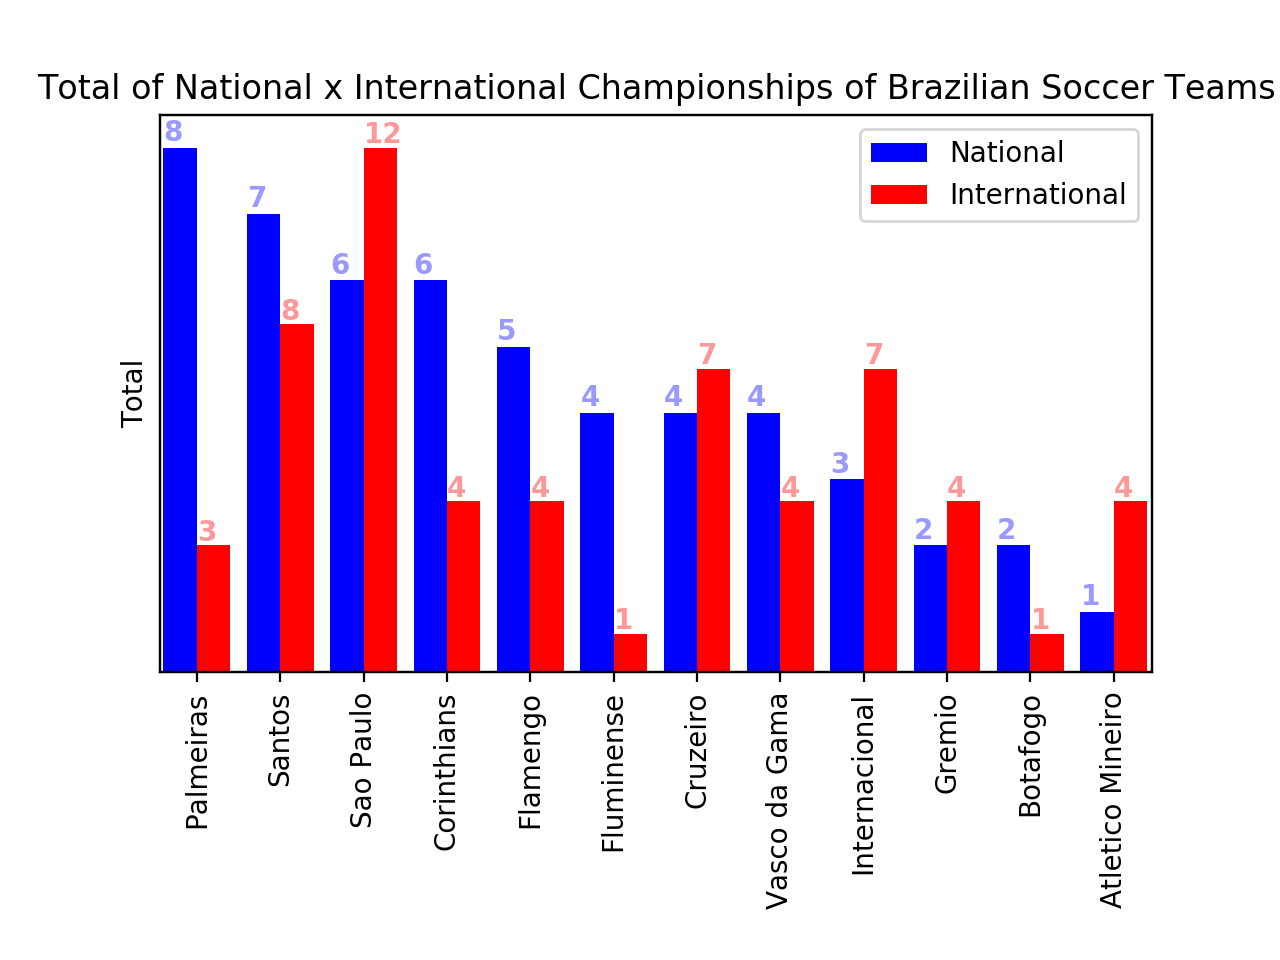

In [208]:
width = 0.4
fig = plt.figure()
fig.subplots_adjust(bottom=0.3)
ax = fig.add_subplot(111)
ax2 = ax.twinx()
p1 = df.Total_National.plot(kind='bar', color='blue', ax=ax, width=width, position=1, label='National')
p2 = df.Total_International.plot(kind='bar', color='red', ax=ax2, width=width, position=0, label='International')

for i, v in enumerate(tn):
    ax.text(i-width, v+0.1, str(v), color='Blue', alpha=0.4, fontweight='bold')

for i, v in enumerate(ti):
    ax2.text(i, v+0.1, str(v), color='Red', alpha=0.4, fontweight='bold')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=1)

ax.set_ylabel('Total')
ax.set_xticklabels(labels)

ax.set_yticks([])
ax2.set_yticks([])

plt.title('Total of National x International Championships of Brazilian Soccer Teams')
plt.show()